**VINCULAR O GOOGLE DRIVE**

In [ ]:
# Carregue o arquivo ARFF
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/Shareddrives/teste/reconhecimento/dataset_38_sick.arff'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CARREGAR AS BIBLIOTECAS**

In [ ]:
#pip install scipy
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats



**PRÉ-PROCESSAMENTO NOVO**

correlação

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlacao(df):
    #correlação
    # Convertendo variáveis binárias para numéricas
    df_bin_numeric = df.copy()
    df_bin_numeric.replace({'binaria_1': {False: 0, True: 1}, 'binaria_2': {False: 0, True: 1}}, inplace=True)

    # Calculando a matriz de correlação
    matriz_correlacao = df_bin_numeric.corr(numeric_only=False)

    # Criando um mapa de calor usando seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação')
    plt.show()


conversão

In [ ]:
import numpy as np
import pandas as pd

def ausentes_conversoes(df):

    # Supondo que df seja o seu DataFrame com os valores ausentes
    # Substituir valores -1 por NaN
    df.replace(-1, np.nan, inplace=True)

    # Aplica a função de imputação por amostragem aleatória a todas as colunas
    df = df.apply(imputacao_aleatoria)

    # Mapear variáveis binárias para valores numéricos (0 e 1)
    binary_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
                    'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
                    'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
                    'T4U_measured', 'FTI_measured', 'TBG_measured']
    df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == b't' else 0)

    # Mapear a coluna "sex" para valores numéricos (0 e 1) feminino é 1 e masculino é 0
    df['sex'] = df['sex'].map(lambda x: 1 if x == b'F' else 0)

    # Mapear a coluna "Class" para valores numéricos (0 e 1)
    df['Class'] = df['Class'].map(lambda x: 1 if x == b'negative' else 0)

    # Exibir as primeiras linhas do DataFrame após as alterações
    #print(df.head())
    return df

# Função para imputação por amostragem aleatória
def imputacao_aleatoria(coluna):
    # Verifica se há valores não nulos na coluna
    if coluna.notnull().any():
        # Pega os valores não nulos
        valores_nao_nulos = coluna.dropna().values
        # Gera amostras aleatórias para os valores ausentes
        amostras = np.random.choice(valores_nao_nulos, size=coluna.isnull().sum(), replace=True)
        # Substitui os valores ausentes pelas amostras
        coluna[coluna.isnull()] = amostras
    return coluna

divisão_teste

In [ ]:
from sklearn.model_selection import train_test_split

def divisao_teste(df):
    # Suponha que 'df' seja o seu DataFrame e 'target' seja a coluna que você deseja prever
    X = df.drop(columns=['Class'])  # Features
    y = df['Class']  # Rótulos

    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Exiba as dimensões dos conjuntos de treinamento e teste
    print("Dimensões do conjunto de treinamento:", X_train.shape, y_train.shape)
    print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

    return X_train, X_test, y_train, y_test


limpeza

In [ ]:
import pandas as pd

def limpeza(df):
    # Verificar se as colunas existem antes de tentar removê-las
    if 'TBG' in df.columns:
        df = df.drop('TBG', axis=1)

    if 'TT4' in df.columns:
        df = df.drop('TT4', axis=1)

    if 'TBG_measured' in df.columns:
        df = df.drop('TBG_measured', axis=1)

    # Filtrar colunas que não contêm 'measured'
    df = df.loc[:, ~df.columns.str.contains('measured')]

    # Se a coluna referral_source existir
    if 'referral_source' in df.columns:
        df = df.drop('referral_source', axis=1)

    #print(df)

    return df

Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalizacao(df):
    # Selecione as colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64']).columns

    # Crie uma cópia do DataFrame
    df_normalizado = df.copy()

    # Aplique a normalização Z-score apenas nas colunas numéricas
    #z_scaler = StandardScaler()
    #df_normalizado[colunas_numericas] = z_scaler.fit_transform(df[colunas_numericas])

    # Aplique o Min-Max Scaling para restringir os valores no intervalo [0, 1] nas colunas numéricas
    minmax_scaler = MinMaxScaler()
    df_normalizado[colunas_numericas] = minmax_scaler.fit_transform(df_normalizado[colunas_numericas])

    # Exiba as primeiras linhas do DataFrame normalizado
    #print(df_normalizado.head())
    return df_normalizado


outlier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

def detectar_outliers(df):
    # Selecionar apenas as variáveis numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

    # Criar gráficos de dispersão destacando outliers usando Z-score
    for col in colunas_numericas:
        plt.figure(figsize=(8, 6))

        # Calcular Z-score para identificar outliers
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = z_scores > 3  # Definindo limiar para considerar um ponto como outlier

        # Plotar gráfico de dispersão
        sns.boxplot(x=df[col], color='skyblue')  # Boxplot para visualizar outliers
        plt.scatter(x=np.where(outliers)[0], y=df.loc[outliers, col], color='red', label='Outliers')
        plt.title(f'Boxplot de {col} com Outliers Destacados')
        plt.legend()

        # Mostrar o gráfico
        plt.show()



plot correlação

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotar_graficos(df):
    # histograma das variáveis numéricas
    '''df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograma das Variáveis Numéricas", y=1.02, fontsize=16)
    plt.show()'''

    # matriz de correlação
    matriz_correlacao = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Matriz de Correlação entre as Variáveis Numéricas")
    plt.show()

    # gráfico de contagem para variáveis categóricas
    colunas_categoricas = df.select_dtypes(include=['object']).columns
    for col in colunas_categoricas:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f"Contagem de Valores em {col}")
        plt.show()


tratando os outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer, RobustScaler

def tratando_outliers(df):
    # Variáveis contínuas
    variaveis_continuas = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

    # Tratamento de outliers usando RobustScaler
    scaler = RobustScaler()
    df[variaveis_continuas] = scaler.fit_transform(df[variaveis_continuas])

    # Aplicação da transformação de Yeo-Johnson
    pt = PowerTransformer(method='yeo-johnson')
    df[variaveis_continuas] = pt.fit_transform(df[variaveis_continuas])

    # Visualize os dados transformados
    print(df[variaveis_continuas].head())

    return df


app

In [ ]:
import pandas as pd
from scipy.io import arff
#from conversoes import ausentes_conversoes
#from normalizacao import normalizacao
#from plot_correlacao import plotar_graficos
#from outliers import detectar_outliers
#from limpeza import limpeza

#Carrega o arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converte os dados para um DataFrame pandas
df = pd.DataFrame(data)

df_normalizado = normalizacao(limpeza(ausentes_conversoes(df)))
#plotar_graficos(df_normalizado)





**TREINAMENTO**

MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#from preProcessing.divisao_teste import divisao_teste

def mlp(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

   # Criar um modelo de MLP com ajustes de hiperparâmetros
    model = MLPClassifier(max_iter=1000, random_state=42)  # Aumentando o número máximo de iterações

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("#################### REDE NEURAL #####################")
    print(classification_report(y_test, y_pred))

RANDOM FOREST

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from preProcessing.divisao_teste import divisao_teste

def randomForest(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Calcular pesos de classes balanceados
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

    # Criar um modelo de RandomForest com pesos balanceados
    #model = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train), class_weights)))
    # Treinar o modelo usando a função train_random_forest
    trained_model = train_random_forest(X_train, y_train)

    # Treinar o modelo
    #model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = trained_model.predict(X_test)

    #Validação cruzada
    resultados = cross_val_score(trained_model, X_train, y_train, cv=10)

    # Exibir métricas de classificação
    print("######################################################")
    print("################# RANDOM FOREST ######################")
    print(classification_report(y_test, y_pred))
    # Exiba os resultados
    print("Resultados da validação cruzada:\n", resultados)
    print("Acurácia média: %.2f%%" % (resultados.mean() * 100))


In [ ]:
############### teste otimização ##########################
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

def train_random_forest(X_train, y_train):
    # Codificar os rótulos de classe
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

    # Converter para array numpy unidimensional (se necessário)
    y_train = np.ravel(y_train)

    # Mapear a coluna "sex" para valores numéricos (0 e 1) feminino é 1 e masculino é 0
    X_train['sex'] = X_train['sex'].map(lambda x: 1 if x == b'F' else 0)

    # Definir o modelo e o espaço de parâmetros
    forest_clf = RandomForestClassifier()
    param_space = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True]
    }

    # Busca aleatória de hiperparâmetros
    forest_rand_search = RandomizedSearchCV(forest_clf, param_space, n_iter=32,
                                            scoring="accuracy", verbose=True, cv=5,
                                            n_jobs=-1, random_state=42)

    # Treinar o modelo
    forest_rand_search.fit(X_train, y_train_encoded)

    return forest_rand_search

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

#from preProcessing.divisao_teste import divisao_teste

def naive_bayes_weighted(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Calcular pesos de classes balanceados
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

    # Aplicar pesos manualmente ao conjunto de treinamento
    weights_train = np.array([class_weights[i] for i in y_train])

    # Criar um modelo de Naive Bayes com pesos balanceados
    model = GaussianNB(priors=None)  # Não usar priors padrão, já que aplicaremos os pesos manualmente

    # Treinar o modelo
    model.partial_fit(X_train, y_train, classes=np.unique(y_train), sample_weight=weights_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("################# NAIVE BAYES #########################")
    print(classification_report(y_test, y_pred))

# Chame a função com o DataFrame desejado
# naive_bayes_weighted(seu_dataframe)


ARVORE DE DECISÃO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#from preProcessing.divisao_teste import divisao_teste

def arvore_decisao(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Criar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("############### ÁRVORE DE DECISÃO ####################")
    print(classification_report(y_test, y_pred))



SVM Kernel Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def svm_kernel_linear(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Criar um modelo de SVM com kernel linear
    model = SVC(kernel='linear', random_state=42)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("############### SVM COM KERNEL LINEAR ##################")
    print(classification_report(y_test, y_pred, zero_division=1))  # ou 'warn', 'raise', 0, ou outro valor apropriado

# Chame a função com o DataFrame desejado
# svm_kernel_linear(seu_dataframe)



svm kernel polinomial

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def svm_kernel_polinomial_weighted(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Calcular pesos de classes balanceados
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

    # Criar um modelo de SVM com kernel polinomial e pesos balanceados
    model = SVC(kernel='poly', random_state=42, class_weight=dict(zip(np.unique(y_train), class_weights)))

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("############# SVM COM KERNEL POLINOMIAL ###############")
    print(classification_report(y_test, y_pred))

# Chame a função com o DataFrame desejado
# svm_kernel_polinomial_weighted(seu_dataframe)



svm kernel sigmoid

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def svm_kernel_sigmoid_weighted(df):
    # Divisão do conjunto de dados em treinamento e teste
    X_train, X_test, y_train, y_test = divisao_teste(df)

    # Calcular pesos de classes balanceados
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

    # Criar um modelo de SVM com kernel sigmoid e pesos balanceados
    model = SVC(kernel='sigmoid', random_state=42, class_weight=dict(zip(np.unique(y_train), class_weights)))

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Exibir métricas de classificação
    print("######################################################")
    print("############### SVM COM KERNEL SIGMOID ################")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)

    # Calcule a precisão para cada classe
    precision_per_class = precision_score(y_test, y_pred, average=None)
    print(f'\nPrecisão por classe: {precision_per_class}')

    # Exiba um relatório de classificação detalhado
    class_report = classification_report(y_test, y_pred)
    print('\nRelatório de Classificação:')
    print(class_report)

# Chame a função com o DataFrame desejado
# svm_kernel_sigmoid_weighted(seu_dataframe)



app treinamento

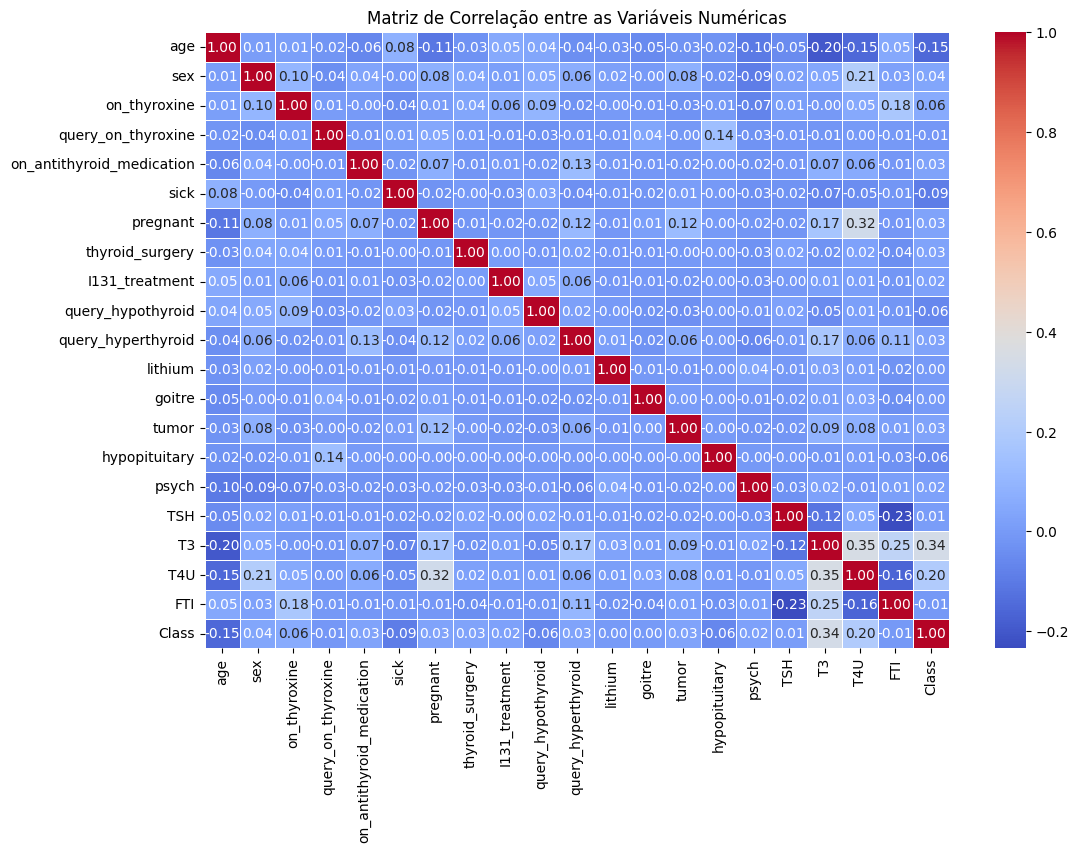

Dimensões do conjunto de treinamento: (2640, 20) (2640,)
Dimensões do conjunto de teste: (1132, 20) (1132,)
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Hiperparâmetros: RandomForestClassifier(max_depth=20, min_samples_leaf=2)
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


######################################################
################# RANDOM FOREST ######################
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        61
           1       0.99      0.99      0.99      1071

    accuracy                           0.98      1132
   macro avg       0.89      0.86      0.88      1132
weighted avg       0.98      0.98      0.98      1132

Resultados da validação cruzada:
 [0.96969697 0.95833333 0.97348485 0.95833333 0.96969697 0.96969697
 0.96212121 0.95833333 0.96212121 0.95075758]
Acurácia média: 96.33%
Dimensões do conjunto de treinamento: (2640, 20) (2640,)
Dimensões do conjunto de teste: (1132, 20) (1132,)
######################################################
############### ÁRVORE DE DECISÃO ####################
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        61
           1       0.99      0.98      0.99      1071

    accurac

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.io import arff

#analisar outras formas de
pd.set_option('display.max_columns', None)

#Carrega o arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converte os dados para um DataFrame pandas
df = pd.DataFrame(data)

# Exiba informações sobre as colunas e valores ausentes
#print(df.info())
# Exiba estatísticas descritivas das colunas numéricas
#print(df.describe())

# Exiba as primeiras linhas do DataFrame
#print(df.head())

# conversoes para binario e preencher ausentes
df_convertido = ausentes_conversoes(df)

df_limpeza = limpeza(df_convertido)

df_normalizado = normalizacao(df_limpeza)
plotar_graficos(df_normalizado)


#correlacao(df_limpeza)
#df_tratado = tratando_outliers(df_normalizado)

randomForest(df_normalizado)
arvore_decisao(df_normalizado)
mlp(df_normalizado)
naive_bayes_weighted(df_normalizado)
svm_kernel_linear(df_normalizado)
#svm_kernel_polinomial_weighted(df_normalizado)
#svm_kernel_sigmoid_weighted(df_normalizado)